<a href="https://colab.research.google.com/github/joshipj22/Netflix-Data-Exploration-Analysis/blob/main/Netflix_Data_Exploration_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Data Exploration Business Case
    
-Data Analysis by Piyush Joshi


https://colab.research.google.com/drive/1xuDlNecC6qOuwxecQxJPifSCCYCeSYjx?pli=1#scrollTo=UD6Ienzcdabn&uniqifier=2

**Importing and analysing the dataframe**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

--2024-05-11 15:41:25--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.37.31, 13.35.37.159, 13.35.37.102, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.37.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  4.25MB/s    in 0.8s    

2024-05-11 15:41:27 (4.25 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [3]:
df=pd.read_csv("netflix.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Insight : The dataframe focuses on the Netflix providing
insightful information about featured movies and TV show with unique show_id and titles spreading across 8807 rows and 12 columns

Recommendation: Data must be cleaned before coming to any actionable insights.

## **Basic Analysis**
1. **Un-nesting the columns**:


In [ ]:
#finding columns with cells having nested values
column = "show_id"
df[df[column].apply(lambda x: "," in str(x))]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [4]:
#finding columns with cells having nested values
column = "title"
df[df[column].apply(lambda x: "," in str(x))]. head(4)
#Assuming "title","date_added" and "description" can have commas as substring

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
140,s141,Movie,"El patrón, radiografía de un crimen",Sebastián Schindel,"Joaquín Furriel, Luis Ziembrowski, Guillermo P...","Argentina, Venezuela","September 1, 2021",2014,TV-MA,100 min,"Dramas, International Movies, Thrillers",A lawyer defends an illiterate man whose explo...
206,s207,Movie,"LSD: Love, Sex Aur Dhokha",Dibakar Banerjee,"Nushrat Bharucha, Anshuman Jha, Neha Chauhan, ...",India,"August 27, 2021",2010,TV-MA,112 min,"Dramas, Independent Movies, International Movies",This provocative drama examines how the voyeur...
221,s222,Movie,"Bob Ross: Happy Accidents, Betrayal & Greed",Joshua Rofé,Bob Ross,NaN,"August 25, 2021",2021,TV-14,93 min,Documentaries,Bob Ross brought joy to millions as the world’...


In [5]:
column = "director"
df[df[column].apply(lambda x: "," in str(x))]. head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",NaN,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."


In [8]:
unnested_dir=df[["title","director"]]
unnested_dir['director'].fillna("unknown_director",inplace=True)
unnested_dir["unnested_director"]=unnested_dir["director"].apply(lambda x: str(x).split(", "))
unnested_dir= unnested_dir.explode("unnested_director").drop("director", axis="columns")
unnested_dir.head(5)

<ipython-input-8-e1f8f0176ebc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnested_dir['director'].fillna("unknown_director",inplace=True)
<ipython-input-8-e1f8f0176ebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnested_dir["unnested_director"]=unnested_dir["director"].apply(lambda x: str(x).split(", "))


,title,unnested_director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,unknown_director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,unknown_director
4,Kota Factory,unknown_director


In [9]:

merge_dir = pd.merge(
    left=df,
    right=unnested_dir,
    on="title"
)

merge_dir.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unnested_director
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",unknown_director
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",unknown_director
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,unknown_director
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Mike Flanagan
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Robert Cullen


In [10]:
column = "cast"
df[df[column].apply(lambda x: "," in str(x))]. head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [11]:
unnest_cast=df[["title","cast"]]
unnest_cast['cast'].fillna("unknown_cast",inplace=True)
unnest_cast["unnested_cast"]=unnest_cast["cast"].apply(lambda x: str(x).split(", "))
unnest_cast= unnest_cast.explode("unnested_cast").drop("cast", axis="columns")
unnest_cast.head(10)

<ipython-input-11-3f8d9b9cd5d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnest_cast['cast'].fillna("unknown_cast",inplace=True)
<ipython-input-11-3f8d9b9cd5d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnest_cast["unnested_cast"]=unnest_cast["cast"].apply(lambda x: str(x).split(", "))


,title,unnested_cast
0,Dick Johnson Is Dead,unknown_cast
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba
1,Blood & Water,Dillon Windvogel
1,Blood & Water,Natasha Thahane
1,Blood & Water,Arno Greeff
1,Blood & Water,Xolile Tshabalala
1,Blood & Water,Getmore Sithole


In [12]:
merge_cast = pd.merge(
    left=df,
    right=unnest_cast,
    on="title"
)
merge_cast.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unnested_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",unknown_cast
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba
5,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Dillon Windvogel
6,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Natasha Thahane


In [13]:
column = "country"
df[df[column].apply(lambda x: "," in str(x))]. head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...


In [14]:
unnest_country=df[["title","country"]]
unnest_country['country'].fillna("unknown_country",inplace=True)
unnest_country["unnested_country"]=unnest_country["country"].apply(lambda x: str(x).split(", "))
unnest_country= unnest_country.explode("unnested_country").drop("country", axis="columns")
unnest_country.head(10)

<ipython-input-14-8e5099cfec85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnest_country['country'].fillna("unknown_country",inplace=True)
<ipython-input-14-8e5099cfec85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnest_country["unnested_country"]=unnest_country["country"].apply(lambda x: str(x).split(", "))


,title,unnested_country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,unknown_country
3,Jailbirds New Orleans,unknown_country
4,Kota Factory,India
5,Midnight Mass,unknown_country
6,My Little Pony: A New Generation,unknown_country
7,Sankofa,United States
7,Sankofa,Ghana
7,Sankofa,Burkina Faso


In [15]:
merge_country = pd.merge(
    left=df,
    right=unnest_country,
    on="title"
)
merge_country.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unnested_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,unknown_country
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",unknown_country
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,unknown_country
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,unknown_country


In [16]:
unnest_list=df[["title","listed_in"]]
unnest_list["unnested_list"]=unnest_list["listed_in"].apply(lambda x: str(x).split(", "))
unnest_list= unnest_list.explode("unnested_list").drop("listed_in", axis="columns")

merge_list= pd.merge(
    left=df,
    right=unnest_list,
    on="title"
)
merge_list.head(4)




<ipython-input-16-ca6797404eca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnest_list["unnested_list"]=unnest_list["listed_in"].apply(lambda x: str(x).split(", "))


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unnested_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries


Note: we can unnest all columns in a single dataframe but that would lead to
duplication of rows and wont be feasable for any aggregation operation.

**Insight:**Netflix has an array of Titles that encompases a spectrum of Internatinal audience spread across multidimensional genres collborated by wide range of directors and actors collaborating from time to time for unique content.
    
**Recommendation:** It's recommended to add and produce more such content that has an international target audience spread across nationalities with a winning combination of director and cast.

### **Basic Analysis**
  **2. Handling null values** :
  For categorical variables with null values, update those rows as
  unknown_column_name and replace continuous variables having null values with 0.

In [17]:
df.isna().sum() #checking columns for Null/NaN values in the entire dataframe

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.columns #finding list of categorical columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
df['director'].fillna("unknown_director",inplace=True)
df['cast'].fillna("unknown_cast",inplace=True)
df['country'].fillna("unknown_country",inplace=True)
df['date_added'].fillna("unknown_date_added",inplace=True)
df['rating'].fillna("unknown_rating",inplace=True)
df['duration'].fillna("unknown_duration",inplace=True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Converting Column "duration" from categorical to continuous for TV shows
and movies respectively  

In [20]:

df['Movie_Mins'] = df[df['type'] == 'Movie']['duration'].apply(lambda x: int(x.split(" ")[0]) if " " in x else 0)
df['Movie_Mins'].fillna(0,inplace=True)
df['Movie_Mins']=df['Movie_Mins'].astype(int)
df['Number_of_Seasons'] = df[df['type']=='TV Show']['duration'].apply(lambda x: int(x.split(" ")[0]) if " " in x else 0 )
df['Number_of_Seasons'].fillna(0,inplace=True)
df['Number_of_Seasons']=df['Number_of_Seasons'].astype(int)


Checking columns for Null/NaN values in the entire dataframe along with new continuous columns 'Movie_Mins' and 'Number_of_Seasons'

In [21]:
df.isna().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
Movie_Mins           0
Number_of_Seasons    0
dtype: int64

In [22]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_Mins,Number_of_Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,0
1,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,1
3,s4,TV Show,Jailbirds New Orleans,unknown_director,unknown_cast,unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,1
4,s5,TV Show,Kota Factory,unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,2


**Insight:** It's essential to handle missing values because it gives us the forsight to work around the missing data because that makes up a sizeable portion and should be handled for readability

**Recommendation:** The dataset is now available for further analysis.

**What does ‘good’ look like?**
______________________________________________________________________________
**1. Find the counts of each categorical variable both using graphical and non-graphical analysis**

In [23]:
#Count of movies and TV Show
type_count=df["type"].value_counts()
type_count


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

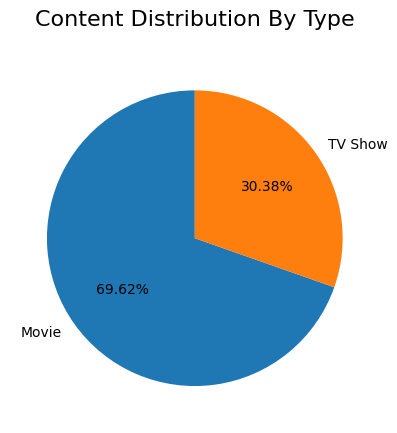

In [36]:
plt.pie(type_count,
        labels=type_count.index,
        startangle=90,
        autopct='%1.2f%%')
colors=['blue', 'orange']
autopct='%1.2f%%'
plt.title("Content Distribution By Type", fontdict={'fontsize': 16}, pad=20)
plt.show()

In [37]:
dir_count=unnest_dir["unnested_director"].value_counts()
dir_count

unnested_director
unknown_director    2634
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
Raymie Muzquiz         1
Stu Livingston         1
Joe Menendez           1
Eric Bross             1
Mozez Singh            1
Name: count, Length: 4994, dtype: int64

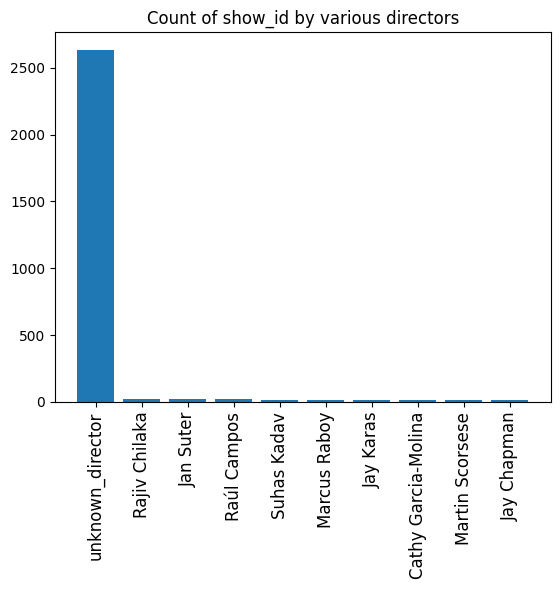

In [38]:
x_bar = dir_count.head(10).index
y_bar = dir_count.head(10)

plt.bar(x_bar, y_bar)
plt.title("Count of show_id by various directors")
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [40]:
duration_count=df["duration"].value_counts()
duration_count

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

**Count of show_id against duration and runtime**

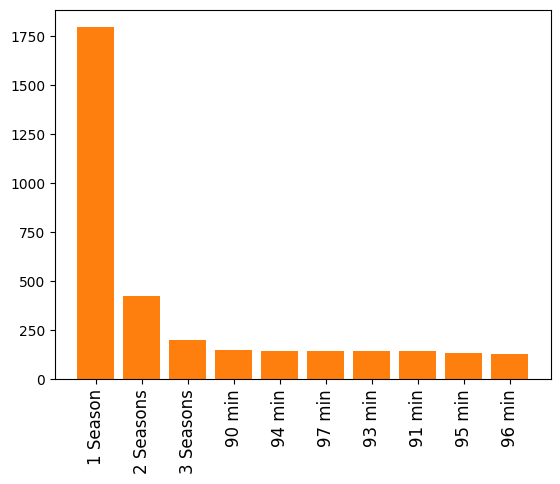

In [47]:
x_bar = duration_count.head(10).index
y_bar = duration_count.head(10)
plt.bar(x_bar, y_bar)

plt.bar(x_bar, y_bar)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [48]:
merge_country['unnested_country'].fillna("unknown_country",inplace=True)
country_count=merge_country["unnested_country"].value_counts()
country_count

unnested_country
United States      3689
India              1046
unknown_country     831
United Kingdom      804
Canada              445
                   ... 
Bermuda               1
Ecuador               1
Armenia               1
Mongolia              1
Montenegro            1
Name: count, Length: 128, dtype: int64

**Count of content by target country audience**

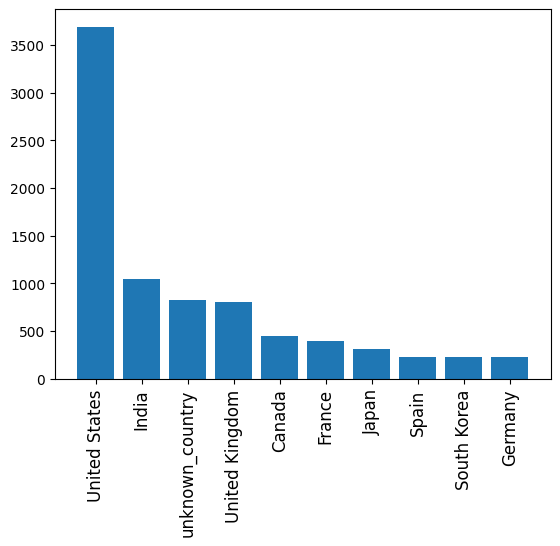

In [50]:
x_bar = country_count.head(10).index
y_bar = country_count.head(10)
plt.bar(x_bar, y_bar)


plt.xticks(rotation=90, fontsize=12)
plt.show()

In [52]:
count_list=unnest_list["unnested_list"].value_counts()
count_list.head(5)

unnested_list
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64

**Count of Content by different genres**

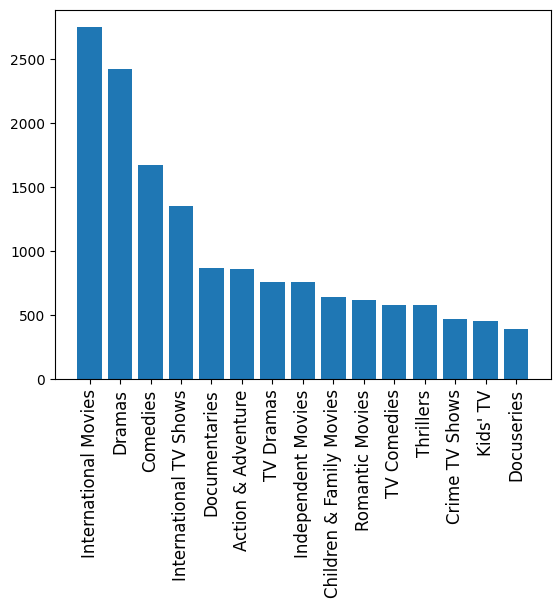

In [53]:
x_bar = count_list.head(15).index
y_bar = count_list.head(15)
plt.bar(x_bar, y_bar)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [ ]:
count_yrs=df["release_year"].value_counts()
count_yrs.head(5)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64

**Distribution of Titles released of the years**




<Axes: xlabel='release_year', ylabel='Count'>

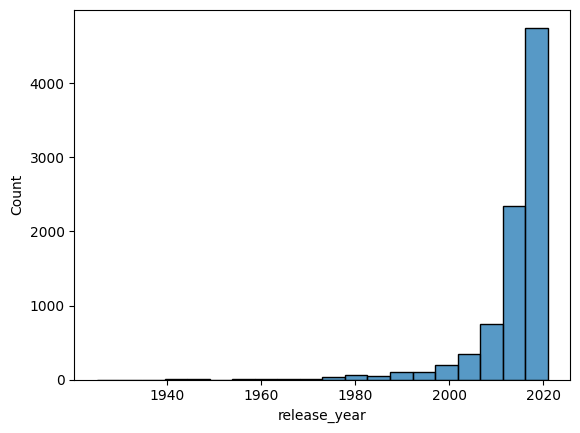

In [ ]:
import seaborn as sns
sns.histplot(df["release_year"],bins=20)

In [55]:
count_rating=df["rating"].value_counts()
count_rating.head(5)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

**Count of Titles by Ratings**

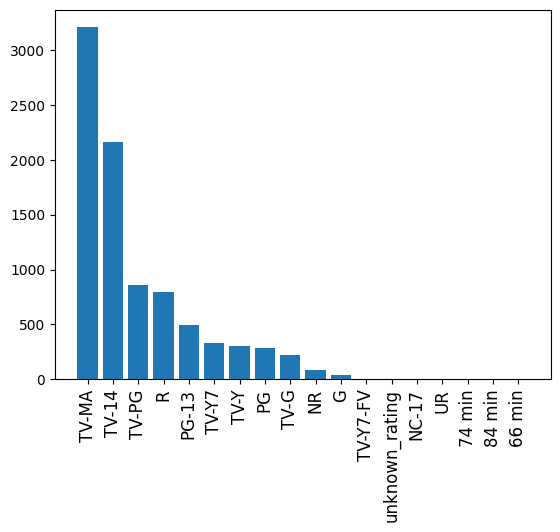

In [56]:
x_bar = count_rating.index
y_bar = count_rating
plt.bar(x_bar, y_bar)

plt.xticks(rotation=90, fontsize=12)
plt.show()

**Insight:**
   

1.   There are 6131 movies and 2676 TV Shows on Netflix
2.   Most popular director after missing values is Rajiv Chilaka
3. Although, there are greater no. of movies available on Netflix,  TV shows or Miniseries with fewer season are more popular than 90 minute movies listed on the platform.
4.   With highest number of TV-MA ratings, Netflix features most of its content for mature audience.  
5.   Netflix audience base is mostly English speaking with USA as the top producer of movies and shows, India is second on the list, Indian viewer are multilingual hence there is huge demand and supply of content in Indian regional languages as well as English language content.   
6.   International movies and dramas are the most popular genre.
7.   Netflix features old clasical movies and TV shows, the oldest was released in 1925.Although, the most number of content was added in recent years,the latest one was added in 2021

**Recommendation**
1. Since India is the leading content producer after USA, it'd be fruitful to invest in Indian content.     
2. Netflix should invest in mineries and TV shows with fewer seasons. Also 90 minutes movies are more desireable than longer duration content.
3. Netflix features most of its content for mature audience thus more conent with genres comprising of Drama, Comedy ,International movies and TV shows with TV-MA ratings should be added.
4. Old Classical movies and TV shows can be added to cater to older audience.   






**2. Comparison of tv shows vs. movies**
  
**a. Find the number of movies produced in each country and pick the top 10 countries**

In [ ]:
grouped = merge_country.groupby("type").get_group("Movie")
grouped["unnested_country"].value_counts().head(10)

unnested_country
United States      2751
India               962
United Kingdom      532
unknown_country     440
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: count, dtype: int64

In [ ]:
merge_country[merge_country["type"] == "Movie"]["unnested_country"].value_counts().head(10)

unnested_country
United States      2751
India               962
United Kingdom      532
unknown_country     440
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: count, dtype: int64

In [ ]:
#Alternate way
merge_country[merge_country["type"] == "Movie"].groupby("unnested_country")["title"].count().sort_values(ascending=[False]).head(10)

unnested_country
United States      2751
India               962
United Kingdom      532
unknown_country     440
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: title, dtype: int64

In [ ]:
#Alternate way
merge_country.loc[merge_country["type"] == "Movie"].groupby("unnested_country")["title"].count().sort_values(ascending=[False]).head(10)

unnested_country
United States      2751
India               962
United Kingdom      532
unknown_country     440
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: title, dtype: int64

b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.


In [ ]:
merge_country[merge_country["type"] == "TV Show"].groupby("unnested_country")["title"].count().sort_values(ascending=[False]).head(10)

unnested_country
United States      938
unknown_country    391
United Kingdom     272
Japan              199
South Korea        170
Canada             126
France              90
India               84
Taiwan              70
Australia           66
Name: title, dtype: int64

**Insight:**

1.   United States is the biggest producer of Movies
2.   United States is the biggest producer of TV Shows
3.   Content coming from USA is more popular than any other english speaking country

**Recommendation:** USA's Movies and TV shows should be given preference over other english speaking countries because the USA based content is majorly popular in rest of the the English speaking world.

**3. What is the best time to launch a TV show?**

    
**a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies**

In [ ]:
pd.read_csv("netflix.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
original_df=pd.read_csv("netflix.csv")
original_df["date_added"]=pd.to_datetime(original_df["date_added"],format='mixed')
original_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
original_df['Release_Week']=original_df['date_added'].dt. day_name()

Best week to release a movie

In [ ]:
original_df[original_df["type"]=="Movie"]["Release_Week"].value_counts().head(1).index[0]

'Friday'

Best week to release the Tv-show

In [ ]:
original_df[original_df["type"]=="TV Show"]["Release_Week"].value_counts().head(1).index[0]

'Friday'

**b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies**

In [ ]:
original_df['Release_month']=original_df['date_added'].dt.month_name()

Best month to release a movie

In [ ]:
original_df[original_df["type"]=="Movie"]["Release_month"].value_counts().head(1).index[0]

'July'

Best month to release a TV Show

In [ ]:
original_df[original_df["type"]=="TV Show"]["Release_month"].value_counts().head(1).index[0]

'December'

**Insight:**
1.  Best month to release a movie is July and TV Show is December
2.  Best week to release a movie and TV Show is Friday

**Reccomendations:**

1.  Release month should be decided catering to festival seasons of the counties of the target audience.
2.   Efforts should be made to put in more advertisement and promotion of content before its release.



**4. Analysis of actors/directors of different types of shows/movies.**

**a. Identify the top 10 directors who have appeared in most movies or TV shows.**






Top 10 directors who have appeared in most movies


In [ ]:
merge_dir['unnested_director'].fillna("unknown_director",inplace=True)
merge_dir[merge_dir["type"]=="Movie"].groupby("unnested_director")["title"].count().sort_values(ascending=[False]).head(10)

unnested_director
unknown_director       188
Rajiv Chilaka           22
Jan Suter               21
Raúl Campos             19
Suhas Kadav             16
Marcus Raboy            15
Jay Karas               15
Cathy Garcia-Molina     13
Youssef Chahine         12
Martin Scorsese         12
Name: title, dtype: int64

Top 10 directors who have appeared in most TV Show

In [ ]:
merge_dir[merge_dir["type"]=="TV Show"].groupby("unnested_director")["title"].count().sort_values(ascending=[False]).head(10)

unnested_director
unknown_director         2446
Ken Burns                   3
Alastair Fothergill         3
Jung-ah Im                  2
Joe Berlinger               2
Hsu Fu-chun                 2
Stan Lathan                 2
Gautham Vasudev Menon       2
Lynn Novick                 2
Shin Won-ho                 2
Name: title, dtype: int64

**Insight:**
1.   Keeping aside missing values, Rajiv Chilaka has directed most films
2.   Keeping aside missing values, Ken Burns has directed most TV shows

**Reccomendations:**
1.   Efforts should be made to bring in directors from all walks of genres which are critically accclaimed and celebrated.
2.   Efforts should be made to promote up and new coming directors.




**5. Which genre movies are more popular or produced more?**

In [ ]:
# Concatenate all words in the 'listed_in' column
text = ' '.join(item for item in merge_list[merge_list["type"]=="Movie"]["unnested_list"])

In [ ]:
# Generate the word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=480, height=480, colormap="Blues", background_color="white").generate(text)

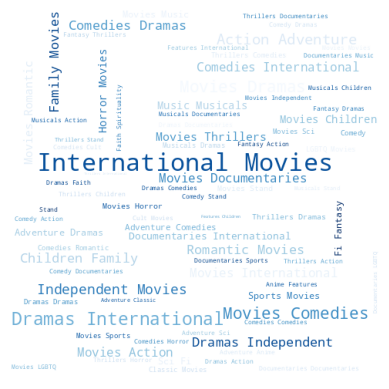

In [ ]:
# Display the word cloud

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Insight:** International movies are most popular genre.


**Reccomendations:** Audience are more intrested Intenation content that can be mixed with comedy, drama and family genres.

---



**6. Find after how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**

In [ ]:

#Converting "release_year" to datetime format
original_df["release_year"]=pd.to_datetime(original_df["release_year"],format='mixed')
original_df['Difference'] = (original_df['date_added'] - original_df['release_year']).dt.days

In [ ]:
#Days the movie will be added to Netflix after the release of the movie
int(original_df[original_df['type']=="Movie"]["Difference"].mode())

<ipython-input-23-16d2442760d9>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(original_df[original_df['type']=="Movie"]["Difference"].mode())


18261

**Insight:** A movie would take approx 18261 days after its release before it's added on Netflix.

**Reccomendation:** Efforts should be made to collaborate with studios and production houses so that an agreement can be reached for an  eariler release.

